In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2013.csv")
df_2013 = pd.read_csv(csv_path)

df_2013

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2013,8/17/2013,10/24/2013,4,256175.500000,Campfire
1,2013,9/10/2013,9/16/2013,1,0.079444,Lightning
2,2013,5/27/2013,5/28/2013,10,1.235317,Vehicle
3,2013,9/18/2013,9/19/2013,14,3.633029,Unknown / Unidentified
4,2013,7/8/2013,7/8/2013,2,0.608927,Equipment Use
...,...,...,...,...,...,...
292,2013,6/29/2013,6/29/2013,10,105.291300,Vehicle
293,2013,7/3/2013,7/3/2013,10,92.912670,Vehicle
294,2013,8/4/2013,8/4/2013,8,14.965620,Playing with fire
295,2013,5/3/2013,5/3/2013,2,353.494100,Equipment Use


In [3]:
# Convert 'Alarm Date' to datetime
df_2013['Alarm Date'] = pd.to_datetime(df_2013['Alarm Date'])

# Extract month name
df_2013['Month'] = df_2013['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2013 = df_2013.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2013['Month'] = pd.Categorical(monthly_summary_2013['Month'], categories=months_order, ordered=True)
monthly_summary_2013 = monthly_summary_2013.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2013['Total Acres Burned'] = monthly_summary_2013['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2013)

        Month  Number of Incidents  Total Acres Burned
4     January                    3              342.70
3    February                    2              769.08
7       March                    6              101.04
0       April                   14              734.94
8         May                   53            78782.92
6        June                   35             8682.29
5        July                   53           104577.94
1      August                   69           353631.14
11  September                   35            13375.42
10    October                   12             3074.31
9    November                   11             4358.86
2    December                    4              991.41


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


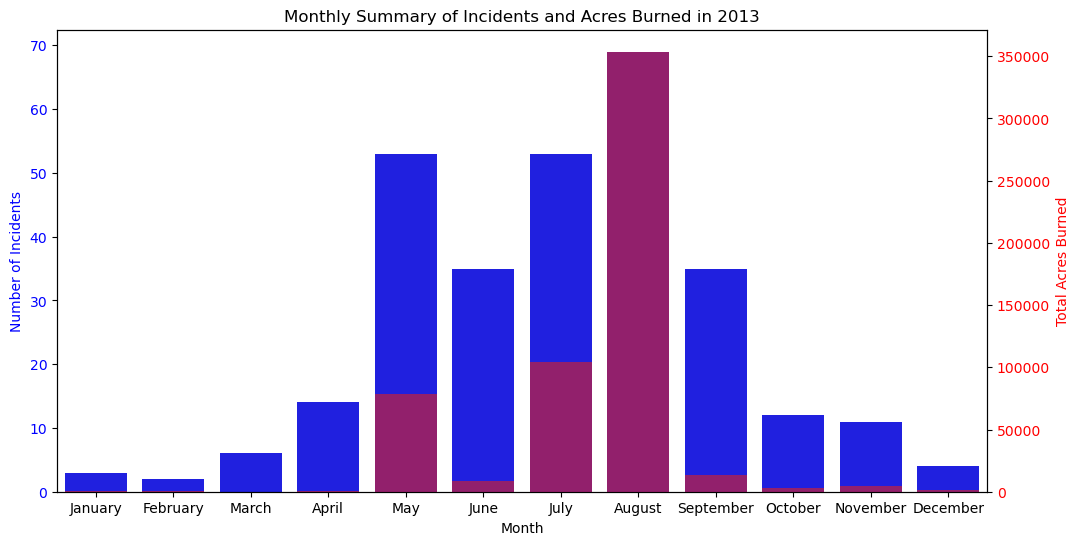

In [4]:
# Convert the sample data to a DataFrame
monthly_summary_2013 = pd.DataFrame(monthly_summary_2013)

# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2013, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2013, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2013')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2013.png")
plt.savefig(output_file)

plt.show()